# LIFE EXPECTANCY
Dor Mizrahi

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time
from sklearn.linear_model import Perceptron

In [3]:
df = pd.read_csv('life_expectancy.csv')
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:

df.interpolate(method='linear',inplace=True)
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
cols=[]
for col in df.columns:
    cols.append(col)




df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.sample(10)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
563,34,12,1,289,83,142,596,1006,472,743,...,91,387,89,0,2145,563,43,36,423,131
403,25,12,1,132,232,41,510,940,8,766,...,6,396,7,7,834,2495,102,94,88,48
1624,103,9,1,106,237,55,73,965,262,636,...,63,584,62,15,863,1416,107,103,89,46
1237,79,12,1,295,127,32,0,1579,208,15,...,4,387,58,0,2170,2688,61,58,376,96
1502,95,3,1,55,39,13,455,244,320,136,...,30,185,24,31,207,1741,103,102,78,93
703,43,1,0,286,105,0,1170,0,391,6,...,89,526,88,0,2396,1626,23,24,650,230
1610,102,7,1,289,76,0,199,163,469,20,...,90,556,88,0,100,13,162,161,350,117
1592,101,9,1,275,112,3,58,1584,455,145,...,89,244,87,0,2215,1690,98,96,475,137
552,33,7,1,324,8,2,750,1306,420,0,...,87,518,86,0,1294,2493,8,8,564,239
712,45,8,1,228,142,9,346,0,420,8,...,90,411,82,0,2354,1763,62,61,682,265


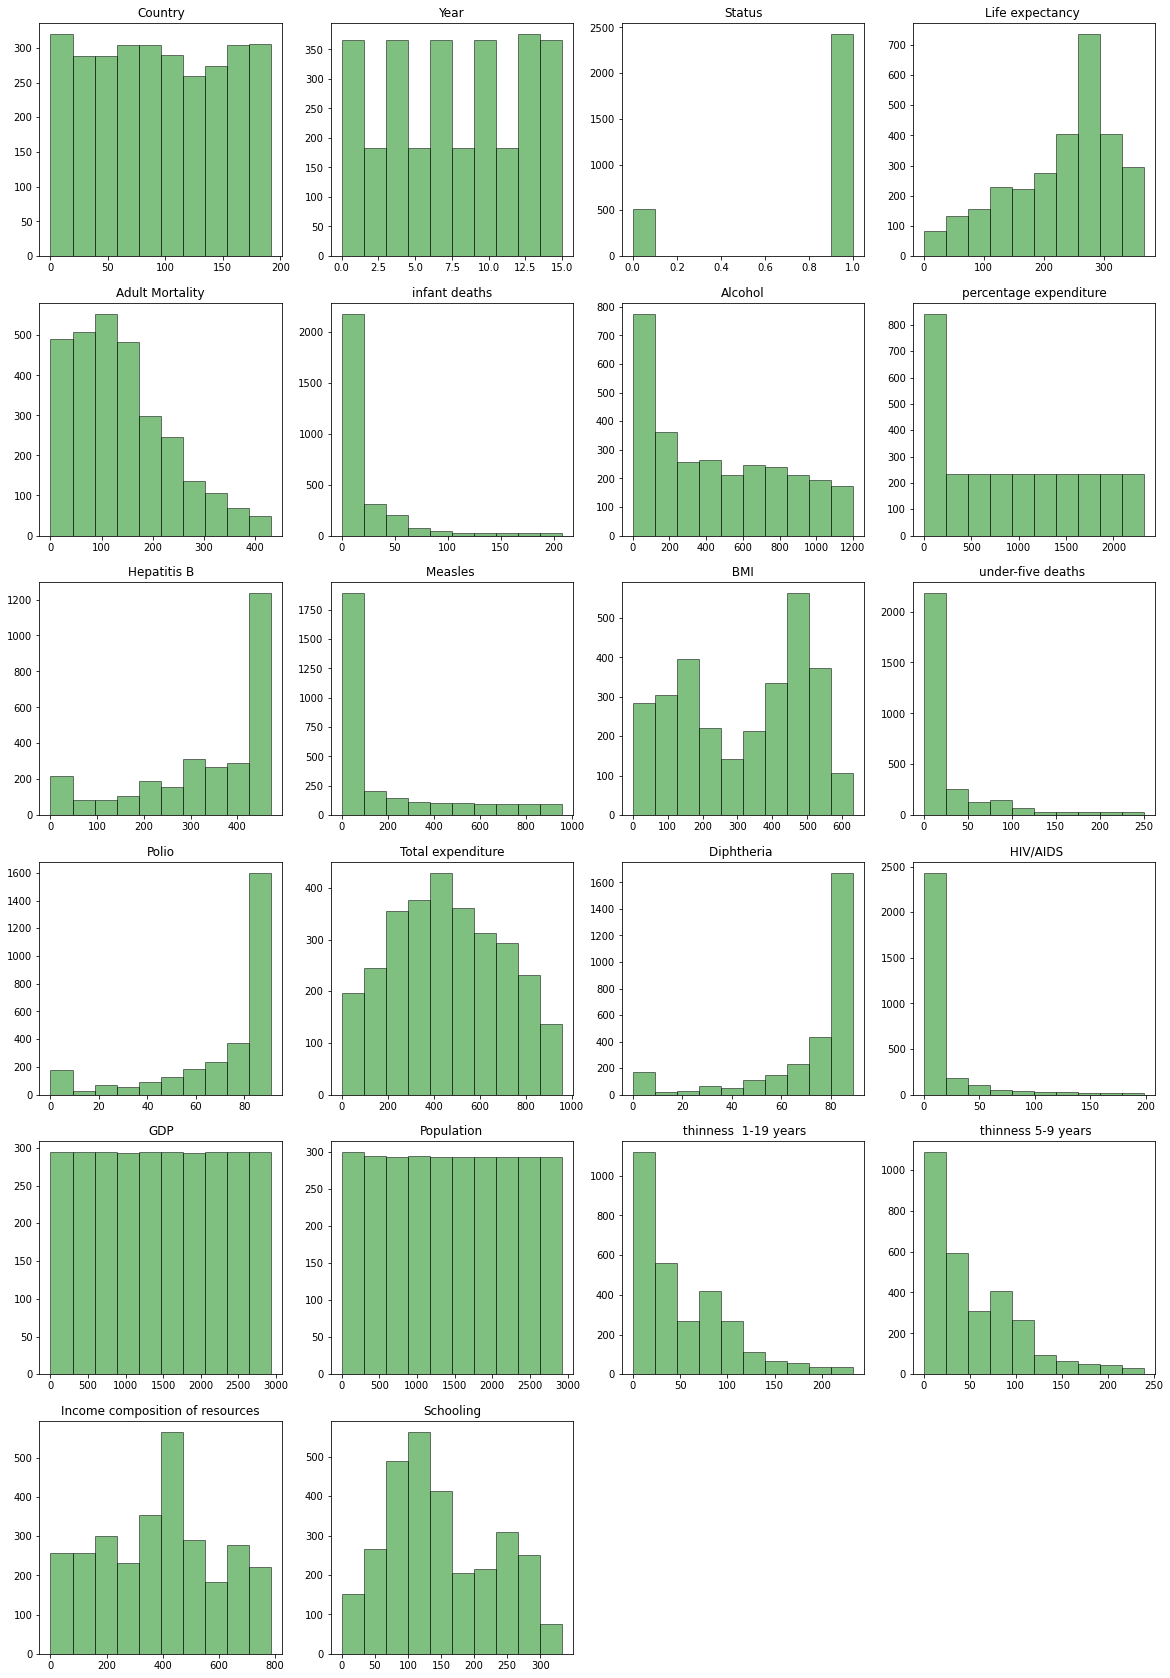

In [8]:
plt.figure(figsize=(20,30))
i = 1
for column in df.columns:
    plt.subplot(6,4,i)
    plt.hist(df[column], color='green', edgecolor = 'black', alpha = 1/2)
    plt.title(column)
    i += 1

<AxesSubplot:>

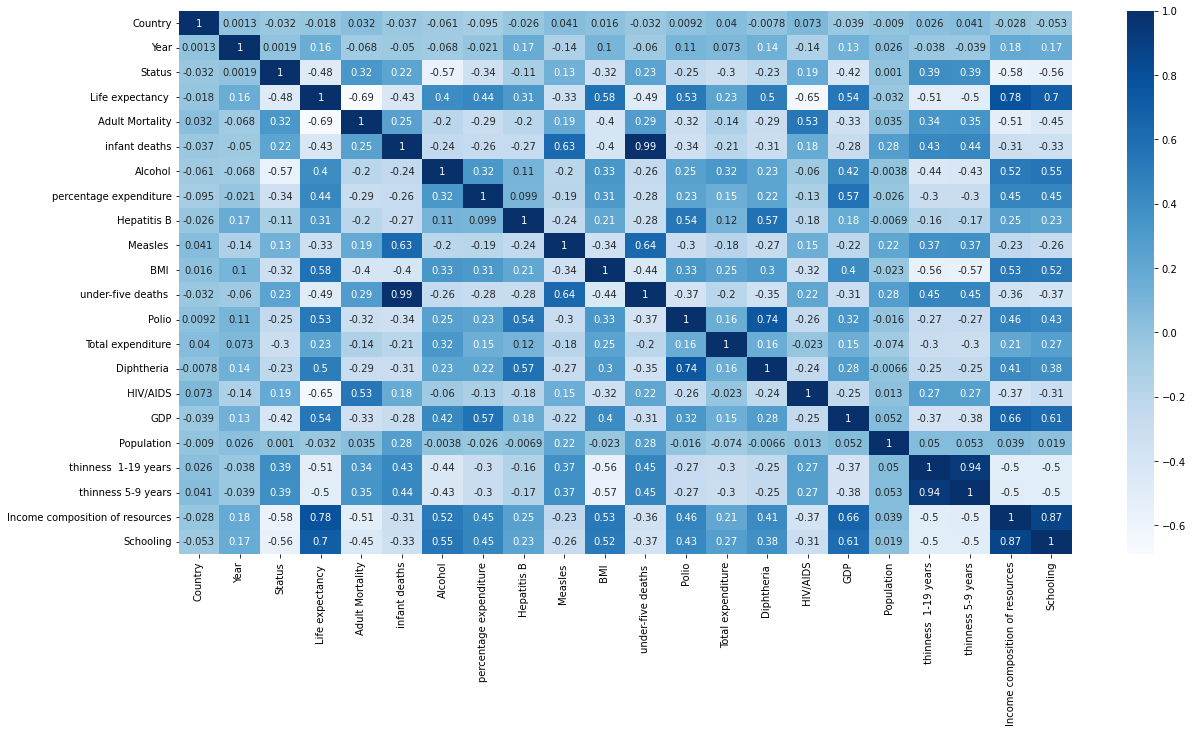

In [9]:
import plotly.express as px
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True,cmap='Blues')

In [10]:
y=df['Life expectancy ']
y.value_counts()

265    45
285    33
315    31
271    28
336    25
       ..
50      1
45      1
97      1
98      1
16      1
Name: Life expectancy , Length: 369, dtype: int64

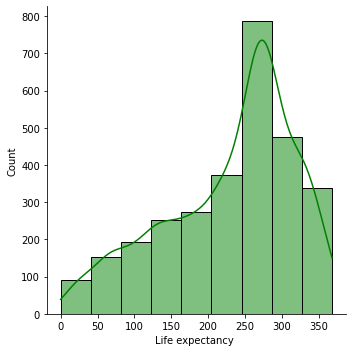

In [11]:
sns.displot(y,kde='True',color='green',bins=9)

In [12]:
X = df.drop(['Life expectancy '],axis=1)
X.shape


(2938, 21)

In [13]:
y.shape

(2938,)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.17, random_state = 77)


# LGBM

In [43]:
import lightgbm as lgb
model=lgb.LGBMRegressor(num_leaves=10,learning_rate=0.08,n_estimators=4000,max_bin=55,bagging_fraction=0.9,bagging_freq=5,feature_fraction=0.2319,feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf=15,min_sum_hessian_in_leaf=11)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(model.score(X_train,y_train))
model.score(X_test,y_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0.9997658159753422


0.9668435914565868

In [44]:
model.score(X_test,y_test)

0.9668435914565868

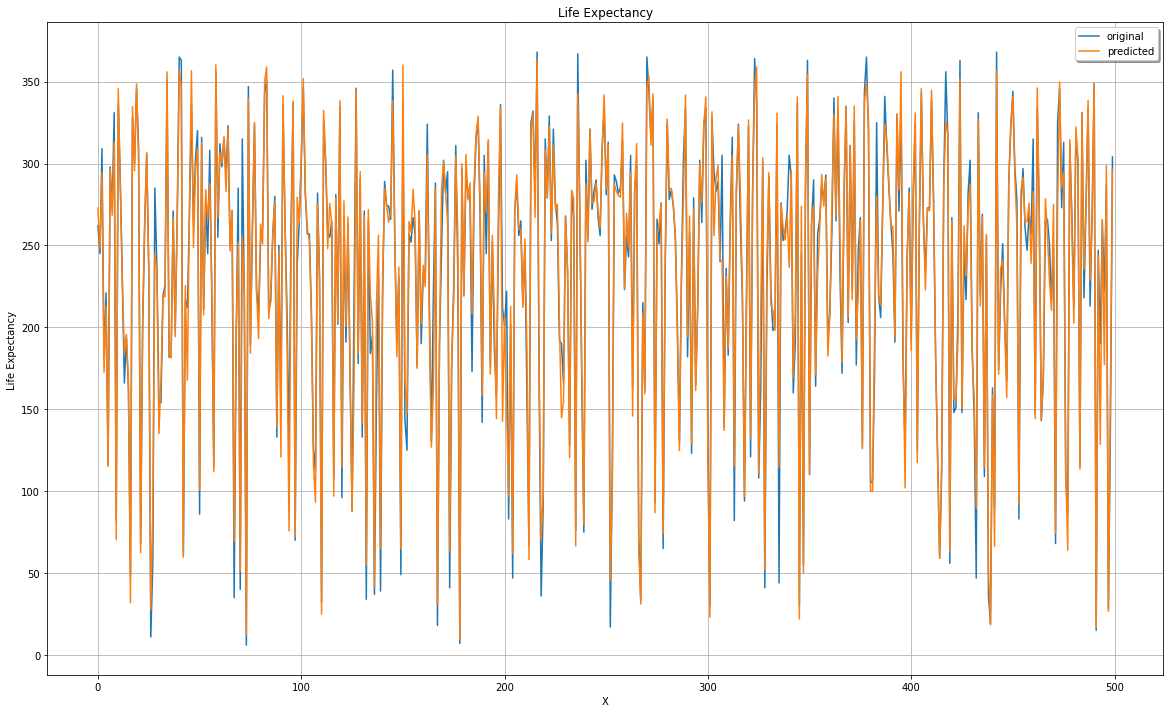

In [45]:
X_ax=range(len(y_test))
plt.figure(figsize=(20, 12))
plt.plot(X_ax, y_test, label="original")
plt.plot(X_ax,y_pred , label="predicted")
plt.title("Life Expectancy")
plt.xlabel('X')
plt.ylabel('Life Expectancy ')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [54]:
!git add ml_sum.pdf

In [55]:
!git commit -m "pdf"

[main 9e41d12] pdf
 Committer: Dor Mizrahi <dorm@h-MacBook-Pro-sl-Dor.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 ml_sum.pdf


In [57]:
! git push 

Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.


# CATBOOST:

In [46]:
#train the model
import catboost as cb
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)
modelCB = cb.CatBoostRegressor(learning_rate=0.05,iterations=1500,random_strength=1)
modelCB.fit(train_dataset)

0:	learn: 84.4165711	total: 1.78ms	remaining: 2.66s
1:	learn: 81.1481739	total: 29.2ms	remaining: 21.8s
2:	learn: 78.1519772	total: 30.9ms	remaining: 15.4s
3:	learn: 75.2876394	total: 32.3ms	remaining: 12.1s
4:	learn: 72.7100059	total: 34.3ms	remaining: 10.2s
5:	learn: 69.9743350	total: 35.9ms	remaining: 8.95s
6:	learn: 67.4068699	total: 37.1ms	remaining: 7.91s
7:	learn: 65.0441422	total: 38.3ms	remaining: 7.14s
8:	learn: 62.7875789	total: 39.5ms	remaining: 6.55s
9:	learn: 60.6539589	total: 41ms	remaining: 6.11s
10:	learn: 58.6985639	total: 42.2ms	remaining: 5.71s
11:	learn: 56.6981984	total: 43.3ms	remaining: 5.36s
12:	learn: 54.8996443	total: 44.4ms	remaining: 5.08s
13:	learn: 53.1264859	total: 45.5ms	remaining: 4.83s
14:	learn: 51.5231481	total: 46.7ms	remaining: 4.62s
15:	learn: 49.9009888	total: 48ms	remaining: 4.45s
16:	learn: 48.4143734	total: 49.3ms	remaining: 4.3s
17:	learn: 46.8973476	total: 50.3ms	remaining: 4.14s
18:	learn: 45.4487906	total: 51.5ms	remaining: 4.01s
19:	lear

In [47]:
score=modelCB.score(test_dataset)
score

0.9690160574572

# XGboost

In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost as xgb 
from sklearn.metrics import r2_score, mean_squared_error

param_search = {
 'max_depth':(5,6,7,8),
 'min_child_weight': (1,2,3,4,5,10,15),
 'learning_rate': (0.01, 0.03, 0.05,0.07,0.1),
 'subsample': (0.7, 0.8, 0.9, 1.0),
 'alpha':(1,50,75,100,150,175),
}
estimator = xgb.XGBRegressor()
search = RandomizedSearchCV(estimator, param_search, cv=6, n_iter=6, n_jobs=-1)


search.fit(X_train, y_train)


RandomizedSearchCV(cv=6,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'alpha': (1, 50, 75, 100, 150, 175),
                                        'learning_rate': (0.01, 0.03, 0.05,
                                                          0.07, 0.1),
                                        'max_depth': (5, 6, 7, 8),
                                        'min_child_weight': (1, 2, 3, 4, 5, 10,
                                                             15),
                                        'subsample': (0.7, 0.8, 0.9, 1.0)})

In [49]:
search.best_params_

{'subsample': 0.9,
 'min_child_weight': 15,
 'max_depth': 8,
 'learning_rate': 0.1,
 'alpha': 100}

In [50]:
search.score(X_test, y_test)

0.9668170720016187

# USING VOTING :

In [51]:
# regrresor voting
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor(estimators=[('xgb', search), ('lgbm', model), ('cb', modelCB)])
voting_regressor.fit(X_train, y_train)
voting_regressor.score(X_test, y_test)

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0:	learn: 84.4165711	total: 3.37ms	remaining: 5.05s
1:	learn: 81.1481739	total: 5.17ms	remaining: 3.88s
2:	learn: 78.1519772	total: 6.59ms	remaining: 3.29s
3:	learn: 75.2876394	total: 8.05ms	remaining: 3.01s
4:	learn: 72.7100059	total: 9.65ms	remaining: 2.89s
5:	learn: 69.9743350	total: 11.3ms	remaining: 2.81s
6:	learn: 67.4068699	total: 12.5ms	remaining: 2.67s
7:	learn: 65.0441422	

0.97129616556533

# SAVING MODEL JUST FOR EXAMPLE

In [52]:
import pickle


def save_model_to_db(model, client, db, dbconnection, model_name,score):
    import pickle
    import time
    import pymongo
    #pickling the model
    pickled_model = pickle.dumps(model)
    
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    info = mycon.insert_one({"model": pickled_model, 'name': model_name, 'created_time':time.time(),"score": score})
    print(info.inserted_id, ' saved with this id successfully!')
    
    details = {
        'inserted_id':info.inserted_id,
        'model_name':model_name,
        'created_time':time.time()
    }
    
    return details


save_model_to_db(modelCB,'mongodb://localhost:27017',"WORK","AI","EXPECTANCY",score )

630f8509ee274a5e9c504632  saved with this id successfully!


{'inserted_id': ObjectId('630f8509ee274a5e9c504632'),
 'model_name': 'EXPECTANCY',
 'created_time': 1661961481.7936718}

# STACKING

In [53]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('xgb', search), ('lgbm', model), ('cb', modelCB)
    ]
stacked_model = StackingRegressor(estimators=estimators, final_estimator=modelCB)
stacked_model.fit(X_train, y_train)
stacked_model.score(X_test, y_test)



[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
0:	learn: 84.4165711	total: 1.48ms	remaining: 2.21s
1:	learn: 81.1481739	total: 2.93ms	remaining: 2.19s
2:	learn: 78.1519772	total: 4.17ms	remaining: 2.08s
3:	learn: 75.2876394	total: 5.62ms	remaining: 2.1s
4:	learn: 72.7100059	total: 6.97ms	remaining: 2.08s
5:	learn: 69.9743350	total: 8.13ms	remaining: 2.02s
6:	learn: 67.4068699	total: 9.41ms	remaining: 2.01s
7:	learn: 65.0441422	t

0.9642445853871958

# Hope you enjoyed!
Dor